In [1]:
import os
import sys
import gc
# assuming data, models, engine in flicc directory:
flicc_path = os.path.realpath("__file__").split('grid_search')[0]
sys.path.append(flicc_path)
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='gpt2'

In [3]:
results = {'test_acc':[],
           'test_f1':[],
           'eval_acc':[],
           'eval_f1':[],
           'g':[]}

In [4]:
gamma = [2,4,8,16]
lr = 1.0e-4

for g in gamma:
    print(f'Grid search {model_checkpoint}, learning rate {lr}, focal loss gamma {g}')
    data = ClimateDataset(model_to_train=3,model_checkpoint=model_checkpoint,dataset_url=flicc_path,batch_size=32)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
    trainer = Engine(epochs=30,labels=data.labels)
    trainer.model = model.model
    trainer.dataset_encoded = data.dataset_encoded
    test_acc, test_f1, eval_acc, eval_f1 = trainer.run(lr=lr,
                                                       wd=0.0,
                                                       train_dataloader=data.train_dataloader,
                                                       eval_dataloader=data.eval_dataloader,
                                                       test_dataloader=data.test_dataloader,
                                                       focalloss=True,
                                                       gamma=g,
                                                       early_stop=3)
    results['test_acc'].append(test_acc)
    results['test_f1'].append(test_f1)
    results['eval_acc'].append(eval_acc)
    results['eval_f1'].append(eval_f1)
    results['g'].append(g)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, test_acc, test_f1, eval_acc, eval_f1
    gc.collect()

Grid search gpt2, learning rate 0.0001, focal loss gamma 2


Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	18.6426	Val Loss:	2.2669	Accuracy:	0.0444	F1:	0.0200
2 / 30: Train Loss:	15.0795	Val Loss:	2.2198	Accuracy:	0.0976	F1:	0.0785
3 / 30: Train Loss:	12.3682	Val Loss:	2.1914	Accuracy:	0.2041	F1:	0.1898
4 / 30: Train Loss:	8.3449	Val Loss:	1.5825	Accuracy:	0.4083	F1:	0.4090
5 / 30: Train Loss:	5.2102	Val Loss:	1.4070	Accuracy:	0.5148	F1:	0.4995
6 / 30: Train Loss:	3.5574	Val Loss:	1.2921	Accuracy:	0.5621	F1:	0.5762
7 / 30: Train Loss:	2.6059	Val Loss:	1.3318	Accuracy:	0.5296	F1:	0.5377
8 / 30: Train Loss:	2.2642	Val Loss:	1.2509	Accuracy:	0.5503	F1:	0.5389
9 / 30: Train Loss:	1.2442	Val Loss:	1.1904	Accuracy:	0.5799	F1:	0.5986
10 / 30: Train Loss:	0.7236	Val Loss:	1.3489	Accuracy:	0.5592	F1:	0.5520
11 / 30: Train Loss:	0.4242	Val Loss:	1.1742	Accuracy:	0.6213	F1:	0.6122
12 / 30: Train Loss:	0.3153	Val Loss:	1.3359	Accuracy:	0.5710	F1:	0.5667
13 / 30: Train Loss:	0.3371	Val Loss:	1.3372	Accuracy:	0.5828	F1:	0.5557
14 / 30: Train Loss:	0.1726	Val Loss:	1.2425	Accuracy:	0.

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	15.6688	Val Loss:	2.2678	Accuracy:	0.0414	F1:	0.0157
2 / 30: Train Loss:	11.8296	Val Loss:	2.2250	Accuracy:	0.0917	F1:	0.0806
3 / 30: Train Loss:	9.5821	Val Loss:	2.0772	Accuracy:	0.1982	F1:	0.1888
4 / 30: Train Loss:	6.4065	Val Loss:	1.6685	Accuracy:	0.3698	F1:	0.3816
5 / 30: Train Loss:	3.8674	Val Loss:	1.3249	Accuracy:	0.5296	F1:	0.5126
6 / 30: Train Loss:	2.3000	Val Loss:	1.3208	Accuracy:	0.5059	F1:	0.5051
7 / 30: Train Loss:	1.8262	Val Loss:	1.3300	Accuracy:	0.5059	F1:	0.5032
8 / 30: Train Loss:	1.2249	Val Loss:	1.1300	Accuracy:	0.6243	F1:	0.6079
9 / 30: Train Loss:	0.8917	Val Loss:	1.2481	Accuracy:	0.5207	F1:	0.5197
10 / 30: Train Loss:	0.4962	Val Loss:	1.1410	Accuracy:	0.6036	F1:	0.5994
11 / 30: Train Loss:	0.3633	Val Loss:	1.1119	Accuracy:	0.6095	F1:	0.5832
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                         precision    recall  f1-score   support

             ad hominem       0.71      0.54      

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	11.4504	Val Loss:	2.2550	Accuracy:	0.0355	F1:	0.0222
2 / 30: Train Loss:	7.4504	Val Loss:	2.2419	Accuracy:	0.0680	F1:	0.0611
3 / 30: Train Loss:	6.4953	Val Loss:	2.1182	Accuracy:	0.1450	F1:	0.1019
4 / 30: Train Loss:	4.5819	Val Loss:	1.9272	Accuracy:	0.2071	F1:	0.2192
5 / 30: Train Loss:	2.6253	Val Loss:	1.5117	Accuracy:	0.4349	F1:	0.4428
6 / 30: Train Loss:	1.6484	Val Loss:	1.5195	Accuracy:	0.4290	F1:	0.4428
7 / 30: Train Loss:	1.2282	Val Loss:	1.3223	Accuracy:	0.5059	F1:	0.5121
8 / 30: Train Loss:	1.1654	Val Loss:	1.2898	Accuracy:	0.5266	F1:	0.5444
9 / 30: Train Loss:	0.7655	Val Loss:	1.2343	Accuracy:	0.5651	F1:	0.5566
10 / 30: Train Loss:	0.3136	Val Loss:	1.2141	Accuracy:	0.5888	F1:	0.6033
11 / 30: Train Loss:	0.1951	Val Loss:	1.2210	Accuracy:	0.5710	F1:	0.5618
12 / 30: Train Loss:	0.1800	Val Loss:	1.1888	Accuracy:	0.5651	F1:	0.5785
13 / 30: Train Loss:	0.1209	Val Loss:	1.1396	Accuracy:	0.5888	F1:	0.5778
No improvement for 3 epochs. Stopping early.
best (higgest 

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	7.0067	Val Loss:	2.2297	Accuracy:	0.0976	F1:	0.0702
2 / 30: Train Loss:	3.0532	Val Loss:	2.2459	Accuracy:	0.0503	F1:	0.0282
3 / 30: Train Loss:	2.8930	Val Loss:	2.2171	Accuracy:	0.1213	F1:	0.0918
4 / 30: Train Loss:	2.5385	Val Loss:	2.1611	Accuracy:	0.1331	F1:	0.1138
5 / 30: Train Loss:	1.7847	Val Loss:	1.9499	Accuracy:	0.1538	F1:	0.1532
6 / 30: Train Loss:	1.3037	Val Loss:	1.8150	Accuracy:	0.3077	F1:	0.3275
7 / 30: Train Loss:	0.8162	Val Loss:	1.6602	Accuracy:	0.3698	F1:	0.3816
8 / 30: Train Loss:	0.4964	Val Loss:	1.4775	Accuracy:	0.5000	F1:	0.4952
9 / 30: Train Loss:	0.4413	Val Loss:	1.5150	Accuracy:	0.4201	F1:	0.4283
10 / 30: Train Loss:	0.2490	Val Loss:	1.4372	Accuracy:	0.4763	F1:	0.4918
11 / 30: Train Loss:	0.1375	Val Loss:	1.3775	Accuracy:	0.5118	F1:	0.5149
12 / 30: Train Loss:	0.1241	Val Loss:	1.4158	Accuracy:	0.4320	F1:	0.4463
13 / 30: Train Loss:	0.1031	Val Loss:	1.3692	Accuracy:	0.4970	F1:	0.5036
14 / 30: Train Loss:	0.0726	Val Loss:	1.3030	Accuracy:	0.520

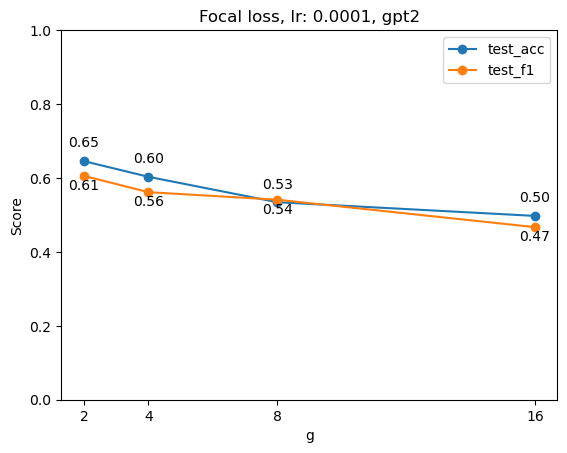

In [5]:
Engine.plot_grid_search(df=results,
                        title=f'Focal loss, lr: {lr}, {model_checkpoint}',
                        column='g',
                        sci_format=False)

In [6]:
%reset -f